# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mochammad Rafly Herdianto
- **Email:** cakprayit25@gmail.com
- **ID Dicoding:** raflyherr

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda harian antara tahun 2011 dan 2012?
- Bagaimana pengaruh kondisi cuaca terhadap rata-rata peminjaman sepeda?
- Apakah jumlah pengguna terdaftar lebih stabil dibandingkan pengguna casual sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini memuat dataset day.csv dan hour.csv yang kemudian akan diubah ke dalam bentuk dataframe menggunakan library pandas

1. Day Dataset

In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Hour Dataset

In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Day Dataframe: Data harian peminjaman sepeda dengan variabel seperti tanggal, musim, cuaca, suhu, kelembaban, kecepatan angin, jumlah pengguna casual, terdaftar, dan total pengguna.
- Hour Dataframe: Data per jam dengan variabel serupa, ditambah dengan kolom jam (hr)

### Assessing Data

Pada tahap ini menilai kualitas dari seluruh data yang akan digunakan (menilai day_df dan hour_df) sebelum dilakukan analisis

1. Day Dataframe

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


2. Hour Dataframe

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada Day & Hour Dataframe masing-masing tidak memiliki missing values, duplicate data, maupun inaccurate data.
- Namun pada Day & Hour Dataframe masing-masing terdapat kesalahan tipe data untuk kolom dteday yakni object yang seharusnya bertipe data datetime.

### Cleaning Data

Pada tahap ini mengganti tipe data pada kolom dteday pada kedua Dataframe menjadi datetime

1. Day Dataframe

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

2. Hour Dataframe

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas

## Exploratory Data Analysis (EDA)

### Explore Data

Pada tahap ini Dataframe yang sudah dibersihkan akan dieksplorasi untuk mengenali data lebih lanjut

In [17]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi dalam 731 hari jumlah peminjam sepeda paling sedikit dalam satu hari adalah 22 orang dan jumlah peminjam sepeda terbanyak dalam satu hari adalah 8714 orang dengan rata-rata jumlah peminjam sebesar 4504.348837 dengan standar deviasinya sebesar 1937.211452.

In [18]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi dalam kurun 17379 jam jumlah peminjam sepeda paling sedikit dalam satu jam adalah 1 orang dan jumlah peminjam sepeda terbanyak dalam satu jam adalah 977 orang dengan rata-rata jumlah peminjam sebesar 189.463088 dengan standar deviasinya sebesar 181.387599.

In [19]:
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

Berdasarkan pivot table di atas, dapat diketahui bahwa rata rata peminjaman sepeda **tertinggi** per harinya ada pada **musim gugur** dan **terendah** pada **musim semi**

In [20]:
day_df.groupby(by="yr").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

Berdasarkan pivot table di atas, dapat diketahui bahwa rata rata peminjaman sepeda **tertinggi** per harinya ada pada **tahun 2012** dan **terendah** pada **tahun 2011**

In [21]:
day_df.groupby(by="mnth").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                                
     nunique   max   min         mean          std
mnth                                              
1         62  4521   431  2176.338710  1161.674370
2         57  5062  1005  2655.298246  1145.313307
3         62  8362   605  3692.258065  1899.301812
4         60  7460   795  4484.900000  1776.160778
5         62  8294  2633  5349.774194  1298.711561
6         60  8120  3767  5772.366667  1240.400031
7         62  8173  3285  5563.677419  1273.751871
8         62  7865  1115  5664.419355  1494.516146
9         60  8714  1842  5766.516667  1810.130649
10        62  8156    22  5199.225806  1988.392517
11        60  6852  1495  4247.183333  1285.712709
12        62  6606   441  3403.806452  1549.639353

Berdasarkan pivot table di atas, dapat diketahui bahwa rata rata peminjaman sepeda **tertinggi** per harinya ada pada **bulan Juni** dan **terendah** pada **bulan Januari**

In [23]:
day_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

Berdasarkan pivot table di atas, dapat diketahui bahwa rata rata peminjaman sepeda **tertinggi** per harinya ada pada kondisi cuaca **Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan** dan **terendah** pada kondisi cuaca **Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan**

In [22]:
hour_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

Berdasarkan pivot table di atas, dapat diketahui bahwa terdapat dua puncak utama dalam peminjaman sepeda yakni **Pagi hari (08.00)** yang memiliki rata-rata 359 peminjam dengan maksimum 839 dan **Sore hari (17.00 - 18.00)** yang memiliki rata-rata 461 dan 425 peminjam dengan maksimum 976 dan 977

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pola penggunaan sepeda harian antara tahun 2011 dan 2012?

In [23]:
main_df = day_df.copy()
mapping_yr = {0: '2011', 1: '2012'}
mapping_mnth = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
                7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
mapping_season = {1:'Musim Semi', 2: 'Musim Panas', 3:'Musim Gugur', 4:'Musim Dingin'}
mapping_weathersit = {1:'Cerah', 2: 'Mendung', 3:'Salju Ringan/Hujan', 4:'Hujan Lebat/Hujan Es'}


main_df['yr'] = main_df['yr'].map(mapping_yr)
main_df['mnth'] = main_df['mnth'].map(mapping_mnth)
main_df['season'] = main_df['season'].map(mapping_season)
main_df['weathersit'] = main_df['weathersit'].map(mapping_weathersit)
main_df = main_df[['dteday', 'yr', 'mnth', 'season', 'weathersit','cnt', 'registered', 'casual']]

print(main_df)

        dteday    yr      mnth      season weathersit   cnt  registered  \
0   2011-01-01  2011   Januari  Musim Semi    Mendung   985         654   
1   2011-01-02  2011   Januari  Musim Semi    Mendung   801         670   
2   2011-01-03  2011   Januari  Musim Semi      Cerah  1349        1229   
3   2011-01-04  2011   Januari  Musim Semi      Cerah  1562        1454   
4   2011-01-05  2011   Januari  Musim Semi      Cerah  1600        1518   
..         ...   ...       ...         ...        ...   ...         ...   
726 2012-12-27  2012  Desember  Musim Semi    Mendung  2114        1867   
727 2012-12-28  2012  Desember  Musim Semi    Mendung  3095        2451   
728 2012-12-29  2012  Desember  Musim Semi    Mendung  1341        1182   
729 2012-12-30  2012  Desember  Musim Semi      Cerah  1796        1432   
730 2012-12-31  2012  Desember  Musim Semi    Mendung  2729        2290   

     casual  
0       331  
1       131  
2       120  
3       108  
4        82  
..      ...  
7

In [24]:
monthly_rentals = main_df.groupby(['yr', 'mnth'])[['cnt', 'registered', 'casual']].sum().reset_index()

monthly_rentals = monthly_rentals[['yr', 'mnth', 'cnt', 'registered', 'casual']]

print(monthly_rentals)

      yr       mnth     cnt  registered  casual
0   2011    Agustus  136691      107849   28842
1   2011      April   94870       72524   22346
2   2011   Desember   87323       78875    8448
3   2011   Februari   48215       41973    6242
4   2011    Januari   38189       35116    3073
5   2011       Juli  141341      104889   36452
6   2011       Juni  143512      112900   30612
7   2011      Maret   64045       51219   12826
8   2011        Mei  135821      104771   31050
9   2011   November  102167       86573   15594
10  2011    Oktober  123511       98289   25222
11  2011  September  127418      100873   26545
12  2012    Agustus  214503      171306   43197
13  2012      April  174224      135768   38456
14  2012   Desember  123713      110468   13245
15  2012   Februari  103137       94416    8721
16  2012    Januari   96744       87775    8969
17  2012       Juli  203607      161902   41705
18  2012       Juni  202830      159536   43294
19  2012      Maret  164875      133257 

In [27]:
indonesian_months = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

monthly_rentals_with_seasons = main_df.groupby(['yr', 'mnth', 'season'])[['cnt', 'registered', 'casual']].sum().reset_index()

monthly_rentals_with_seasons['month_num'] = monthly_rentals_with_seasons['mnth'].map(indonesian_months)

monthly_rentals_with_seasons = monthly_rentals_with_seasons.sort_values(by=['yr', 'month_num']).reset_index(drop=True)

monthly_rentals_with_seasons = monthly_rentals_with_seasons[['yr', 'mnth', 'season', 'cnt', 'registered', 'casual']]

print(monthly_rentals_with_seasons)

      yr       mnth        season     cnt  registered  casual
0   2011    Januari    Musim Semi   38189       35116    3073
1   2011   Februari    Musim Semi   48215       41973    6242
2   2011      Maret   Musim Panas   22839       18970    3869
3   2011      Maret    Musim Semi   41206       32249    8957
4   2011      April   Musim Panas   94870       72524   22346
5   2011        Mei   Musim Panas  135821      104771   31050
6   2011       Juni   Musim Gugur   49726       39413   10313
7   2011       Juni   Musim Panas   93786       73487   20299
8   2011       Juli   Musim Gugur  141341      104889   36452
9   2011    Agustus   Musim Gugur  136691      107849   28842
10  2011  September  Musim Dingin   35526       28824    6702
11  2011  September   Musim Gugur   91892       72049   19843
12  2011    Oktober  Musim Dingin  123511       98289   25222
13  2011   November  Musim Dingin  102167       86573   15594
14  2011   Desember  Musim Dingin   64933       59638    5295
15  2011

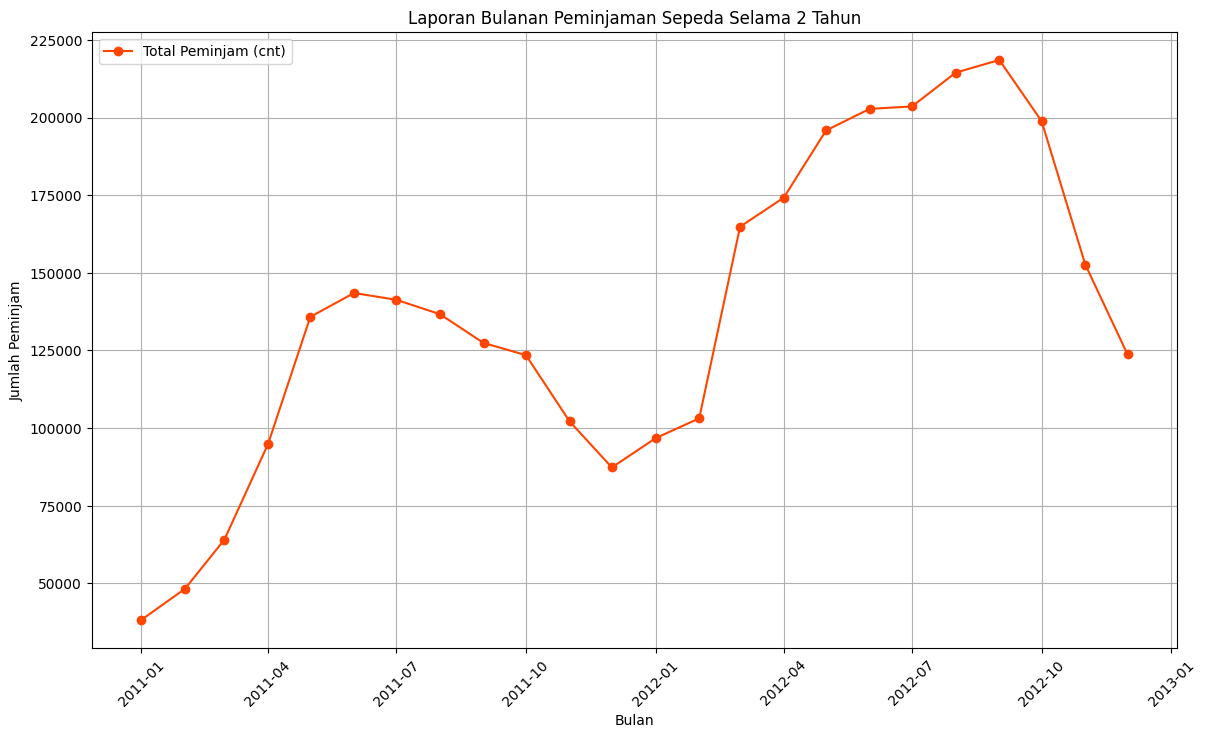

In [40]:
month_mapping = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

monthly_rentals['mnth_eng'] = monthly_rentals['mnth'].map(month_mapping)

monthly_rentals['date'] = pd.to_datetime(
    monthly_rentals['yr'].astype(str) + '-' + monthly_rentals['mnth_eng'],
    format='%Y-%B'
)
monthly_rentals = monthly_rentals.sort_values('date')

plt.figure(figsize=(14, 8))
plt.plot(monthly_rentals['date'], monthly_rentals['cnt'], marker='o', label='Total Peminjam (cnt)', color='orangered')
plt.title('Laporan Bulanan Peminjaman Sepeda Selama 2 Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjam')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa terjadi peningkatan jumlah peminjaman di tahun 2012 dibandingkan dengan tahun 2011. Kemudian terdapat juga pola yang konsisten dengan peningkatan peminjaman yang terjadi selama rentang bulan Januari sampai bulan Juni dan penurunan peminjaman yang terjadi selama rentang bulan Oktober sampai bulan Desember di kedua tahun. Hal tersebut tentunya sangat dipengaruhi oleh beberapa faktor di antaranya adalah terjadinya musim pada bulan tertentu dan juga cuaca.

### Pertanyaan 2:

Bagaimana pengaruh kondisi cuaca terhadap rata-rata peminjaman sepeda?

C:\Users\USER\AppData\Local\Temp\ipykernel_29104\3014320048.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=weather_agg, x="weathersit", y="cnt", palette="coolwarm")


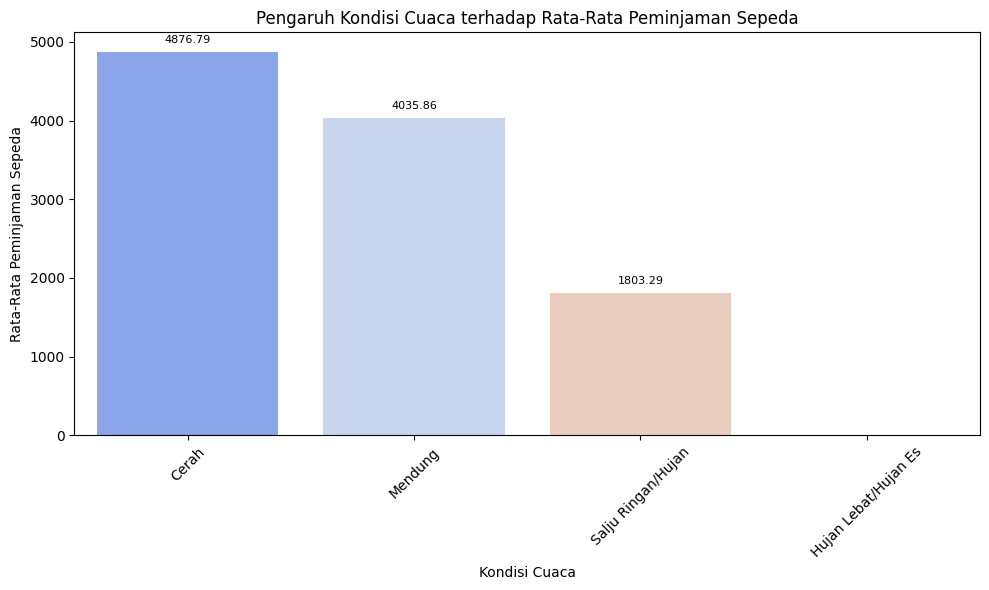

In [33]:
weather_agg = main_df.groupby("weathersit")["cnt"].mean().reset_index()

order = ['Cerah', 'Mendung', 'Salju Ringan/Hujan', 'Hujan Lebat/Hujan Es']
weather_agg['weathersit'] = pd.Categorical(weather_agg['weathersit'], categories=order, ordered=True)
weather_agg = weather_agg.sort_values('weathersit')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=weather_agg, x="weathersit", y="cnt", palette="coolwarm")
plt.title("Pengaruh Kondisi Cuaca terhadap Rata-Rata Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-Rata Peminjaman Sepeda")
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=8, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa kondisi cuaca sangat berpengaruh terhadap peningkatan rata-rata peminjaman sepeda. Pada cuaca cerah menunjukkan rata-rata peminjaman sepeda sebesar 4876.79. Kemudian pada cuaca mendung menunjukkan rata-rata peminjaman sepeda sebesar 4035.86. Kemudian pada cuaca salju ringan/hujan menunjukkan rata-rata peminjaman sepeda sebesar 1803.29. Dan pada cuaca hujan lebat/hujan es sama sekali tidak ada peminjaman sepeda. 

### Pertanyaan 3:

Apakah jumlah pengguna terdaftar lebih stabil dibandingkan pengguna casual sepanjang tahun?

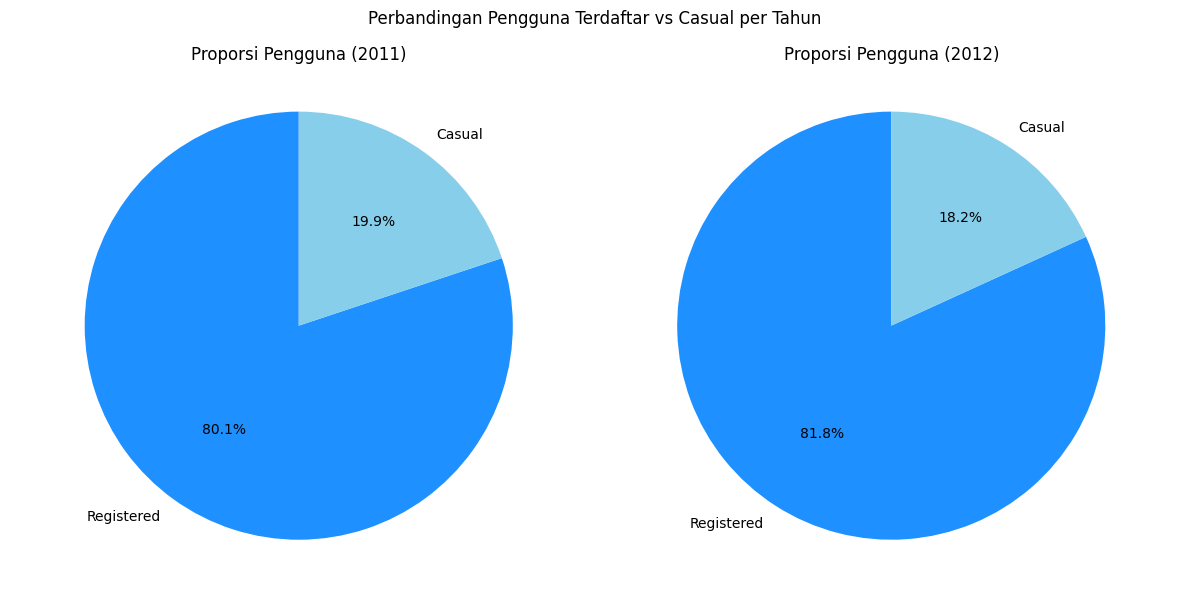

In [38]:
data_2011 = main_df[main_df['yr'] == '2011']
data_2012 = main_df[main_df['yr'] == '2012']

total_registered_2011 = data_2011['registered'].sum()
total_casual_2011 = data_2011['casual'].sum()

total_registered_2012 = data_2012['registered'].sum()
total_casual_2012 = data_2012['casual'].sum()

labels = ['Registered', 'Casual']
colors = ['dodgerblue', 'skyblue']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sizes_2011 = [total_registered_2011, total_casual_2011]
axes[0].pie(sizes_2011, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=False)
axes[0].set_title('Proporsi Pengguna (2011)')
axes[0].axis('equal') 

sizes_2012 = [total_registered_2012, total_casual_2012]
axes[1].pie(sizes_2012, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=False)
axes[1].set_title('Proporsi Pengguna (2012)')
axes[1].axis('equal')

plt.suptitle('Perbandingan Pengguna Terdaftar vs Casual per Tahun')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah pengguna terdaftar cenderung stabil bahkan mengalami peningkatan dibandingkan pengguna casual. Hal ini menunjukkan pemilik bisnis harus selalu memperhatikan perkembangan dalam pemasaran maupun value bisnis agar jumlah pengguna terdaftar terus meningkat di tahun-tahun berikutnya.

## Conclusion

Berdasarkan proses analisis data yang dilakukan menggunakan dataset Bike-Sharing dengan beberapa pertanyaan bisnis yang telah disebutkan di awal, dapat disimpulkan sebagai berikut:

- Terjadi peningkatan jumlah peminjaman di tahun 2012 dibandingkan dengan tahun 2011. Kemudian terdapat juga pola yang konsisten dengan peningkatan peminjaman yang terjadi selama rentang bulan Januari sampai bulan Juni dan penurunan peminjaman yang terjadi selama rentang bulan Oktober sampai bulan Desember di kedua tahun. Hal tersebut tentunya sangat dipengaruhi oleh beberapa faktor di antaranya adalah terjadinya musim pada bulan tertentu dan juga cuaca.
- Kondisi cuaca sangat berpengaruh terhadap peningkatan jumlah peminjaman sepeda. Pada cuaca cerah menunjukkan rata-rata peminjaman sepeda sebesar 4876.79. Kemudian pada cuaca mendung menunjukkan rata-rata peminjaman sepeda sebesar 4035.86. Kemudian pada cuaca salju ringan/hujan menunjukkan rata-rata peminjaman sepeda sebesar 1803.29. Dan pada cuaca hujan lebat/hujan es sama sekali tidak ada peminjaman sepeda.
- Jumlah pengguna terdaftar cenderung stabil bahkan mengalami peningkatan dibandingkan pengguna casual. Hal ini menunjukkan pemilik bisnis harus selalu memperhatikan perkembangan dalam pemasaran maupun value bisnis agar jumlah pengguna terdaftar terus meningkat di tahun-tahun berikutnya.

In [39]:
# Menyimpan dataframe 'main_df' dalam bentuk csv untuk menjadi data utama pada pembuatan dashboard

# main_df.to_csv("dashboard/main_data.csv", index=False)